In [1]:
packages <- c(
    "ggplot2",
    "dplyr",
    "patchwork",
    "gridExtra"
)
for (pkg in packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                pkg,
                character.only = TRUE,
                quietly = TRUE
            )
    )
    )
}

In [2]:
# figure panels
predicted_pca_over_time <-  png::readPNG(
    file.path("../../../5.bulk_timelapse_model/figures/pca_over_time.png")
)
predicted_PC1 <-  png::readPNG(
    file.path("../../../5.bulk_timelapse_model/figures/predicted_PC1.png")
)
predicted_PC2 <-  png::readPNG(
    file.path("../../../5.bulk_timelapse_model/figures/predicted_PC2.png")
)
predicted_Terminal_Intensity_MeanIntensity_AnnexinV <-  png::readPNG(
    file.path("../../../5.bulk_timelapse_model/figures/predicted_Terminal_Intensity_MeanIntensity_AnnexinV.png")
)
# rasterize the images for ggplot compatibility
predicted_pca_over_time_raster <- grid::rasterGrob(
    predicted_pca_over_time,
    interpolate = TRUE
)
predicted_PC1_raster <- grid::rasterGrob(
    predicted_PC1,
    interpolate = TRUE
)
predicted_PC2_raster <- grid::rasterGrob(
    predicted_PC2,
    interpolate = TRUE
)
predicted_Terminal_Intensity_MeanIntensity_AnnexinV_raster <- grid::rasterGrob(
    predicted_Terminal_Intensity_MeanIntensity_AnnexinV,
    interpolate = TRUE
)

In [ ]:
# add all of the images to a single plot
predicted_pca_over_time_plot <- ggplot() +
    annotation_custom(predicted_pca_over_time_raster) +
    theme_void() 
predicted_PC1_plot <- ggplot() +
    annotation_custom(predicted_PC1_raster) +
    theme_void() 

predicted_Terminal_Intensity_MeanIntensity_AnnexinV_plot <- ggplot() +
    annotation_custom(predicted_Terminal_Intensity_MeanIntensity_AnnexinV_raster) +
    theme_void() 



In [14]:
layout <- "
AABB
CCCC
"
# combine the plots into a single figure
predicted_combined_plot <- (
    predicted_pca_over_time_plot
    + predicted_PC1_plot 
    + predicted_Terminal_Intensity_MeanIntensity_AnnexinV_plot
    + plot_layout(design = layout)
    + plot_annotation(
        title = "Predicted PCA over time",
        theme = theme(
            plot.title = element_text(hjust = 0.5, size = 16)
        )
    )
)

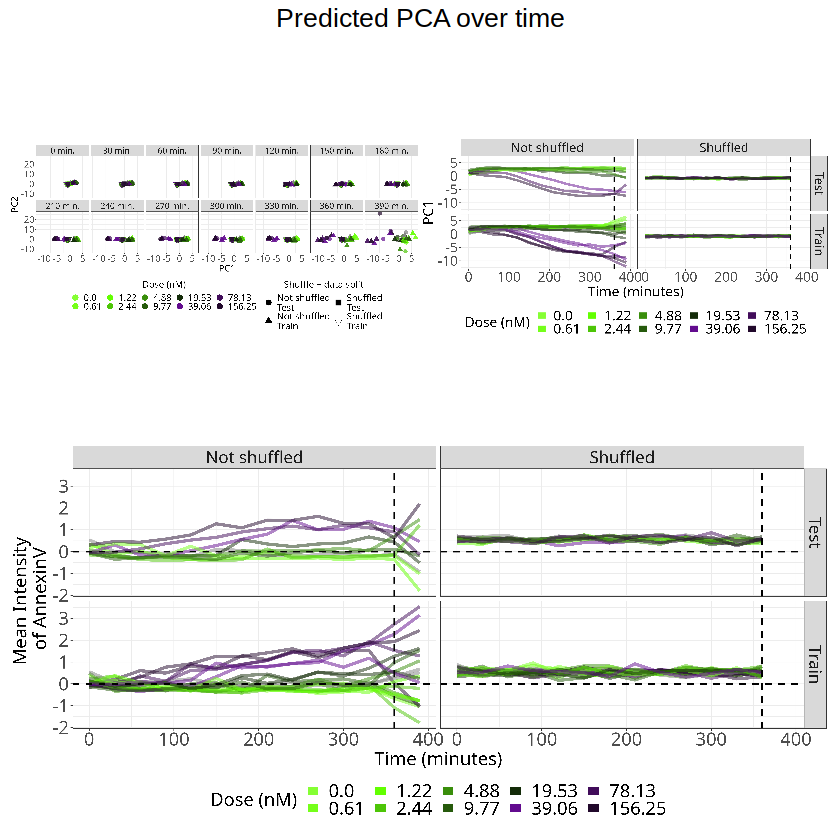

In [15]:
predicted_combined_plot